# 1. Anscombe's quartet

In this introductory course to data science we will start by introducing the basics of the discipline. In this first part of the course we will explain the first steps towards working with data and the basic theoretical conceps needed to analyse a data set. 

In [1]:
#!conda install -y numpy pandas matplotlib seaborn statsmodels

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
sns.set(style="ticks")

We will be using a data set called the **Anscombe** dataset, that can be loaded from the seaborn examples. 

In [130]:
df = sns.load_dataset("anscombe")

And df is... a pandas dataframe

In [131]:
type(df)

pandas.core.frame.DataFrame

that we can print, plot, ...

This data set is comprised of three columns. Two of them, called **'x'** and **'y'** are filled with *numerical* values, while the **'dataset'** column is filled with string values. Each of these values contained in the 'dataset' column will be either **'I'**,**'II'**,**'III'**,**'IV'**. This means that the dataset column is a *categorical* value.

We can visualize the first five rows of a DataFrame using the **head()** function. We also have a column compriosed of integer values that we will use as an *index*.

In [132]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


# 2. Exploring the data

## 2.1 The line plot

When dealing with a nex data set we should start by doing some *data exploration*. This means that we should try to get an intuitive idea of how the data is structured, and how the different columns are related to each other.

As we don't know anything about the data set we will start by plotting the two numeric columns ordered by their index values. 

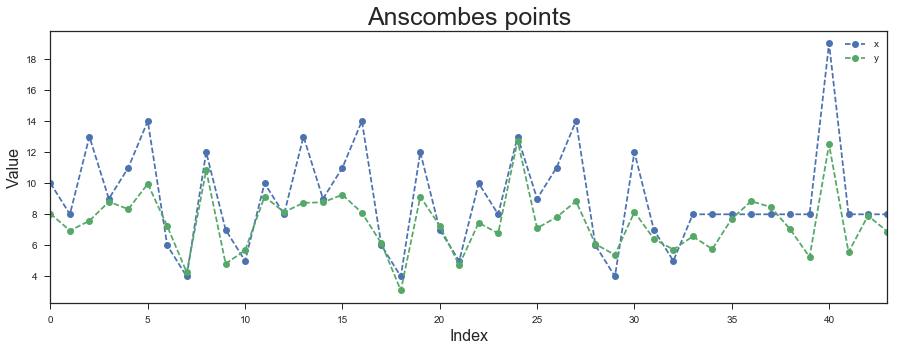

In [143]:
df[['x','y']].plot( linestyle='--', marker='o',figsize=(15,5))
plt.title('Anscombes points',fontsize=25)
plt.xlabel('Index',fontsize=16)
_ = plt.ylabel('Value',fontsize=16)

This is called a *line plot*. In this plots we will represent the values of different columns in the *y axis* relative to its index value, represented in the *x axis*. This kinds of plot helps us understand how the index value (and thus the order) affects the structure of the data. 

This plot also allows us to compare the values of different columns at a given moment (index value).

As we can see, this plot doesn't give us any intuitive idea of how the data is structured. This probably means that the index value does not have a meaning impact on how the data is structured. 


## 2.2 The scatter plot

Given that the two columns do no seem to be related to the index value, we will try to figure out if they are related to each other. One graphical way to see how the two series of points are related to each other is by using a scatter plot.

In this plot, instead of plotting the value of a column against an index, we will plot it against the value the other column have at a given index. In this plot the ordering of the data doesn't matter (you cannot see the information contained in the index column in this plot.)

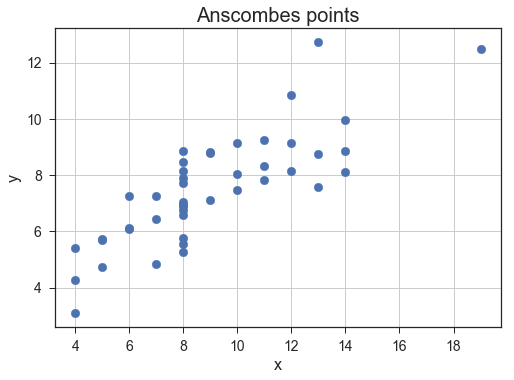

In [142]:
df.plot(kind='scatter',x='x',y='y',fontsize=14,s=75)
plt.title('Anscombes points',fontsize=20)
plt.xlabel('x',fontsize=16)
plt.grid()
_ = plt.ylabel('y',fontsize=16)

This is a scatter plot. This speciffic plot answers the following question:

When a point of the data set in the column 'x' had a value of x, which was the value y contained in the column 'y'? (or vice versa).

In order to answer the question with the plot we only have to substitue the value x for the number we want, and search for that number in the lowe *axis* of the plot, labeled *x*. The answer y will be the height of the points that lie in an straight parallel to the grid and starts at x.

Now, at least we can infer some structure in our data. In this plot it almost seems as if the points were more or less distributed across an imaginary straight line. 

## 3 Representing categories

Since now, we have not paid much attention to the 'dataset' column. This column is comprised of four different values:

In [146]:
df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

It is possible to interpret the values contained in this column as labels atached to each row. This means that a categorical value can be interpreted as a column that allows us to break our data set in different subsets. Each of the elements of these diferent "mini data sets" will have the same value. This is what is knows as *grouping a data set by a categorical value".

We can also see that these labels represent numbers, so we will add a column to our database representing the same numeric value in decimal base. This way we can represent the information contained in the labels without getting errors in the pandas plotting interface. 




In [164]:
number_mapping = lambda x: x.count('I') if x.count('V')==0 else 4#apply a function value by value to all 
df['num_ix'] = df['dataset'].map(number_mapping)#the values conteined a column
df.head(3)#change the number of displayed rows

,dataset,x,y,num_ix
0,I,10.0,8.04,1
1,I,8.0,6.95,1
2,I,13.0,7.58,1


In order to represent the category we will assignt a different color to each different value. This means defining a *color map* between the label values and its visual representation. One of the possible ways of doing it is by manually defining a colormap. 

In [169]:
from matplotlib.colors import LinearSegmentedColormap
vmax=3
cmap = LinearSegmentedColormap.from_list('mycmap', [(0/vmax ,'blue'),
                                                    (1/vmax, 'green'),
                                                    (2/vmax, 'red'),
                                                    (3/vmax, 'yellow')]
                                        )



Now that we are to plot,we will see how the different categorical values are distributed across the data set with the two kind a plot that we already know: the scatter plot.

We will make two different scatter plots. Frist we will plot the value of one numerical-valued colum versus the index value, and we will color each point according to its 'dataset' category.

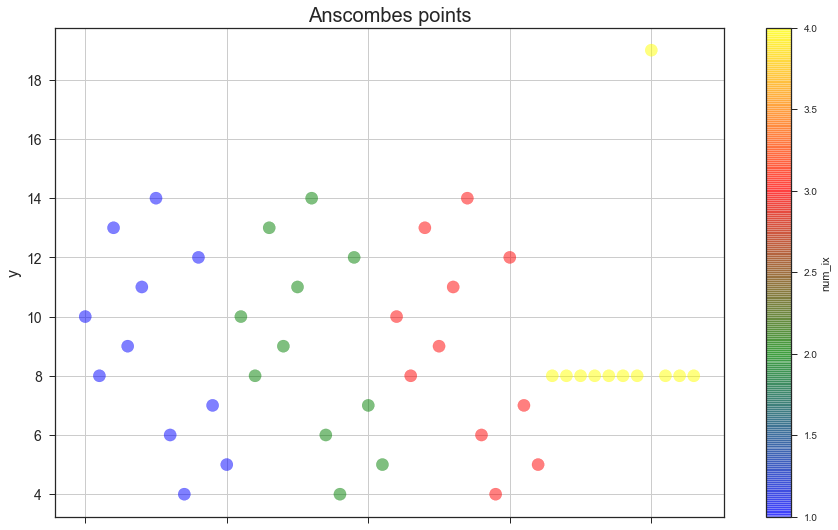

In [194]:

df.reset_index().plot(kind='scatter',
                      x='index',
                      y='x',
                      fontsize=14,
                      s=150,c='num_ix',
                      cmap=cmap,figsize=(15,9),alpha=0.5)
plt.title('Anscombes points',fontsize=20)
plt.xlabel('x',fontsize=16)
plt.grid()
_ = plt.ylabel('y',fontsize=16)

We can see in this plot how the index actually represents the differnt classes ordered. This supports our initial hypothesis that the index is not related to the 'x' and 'y' columns. Now lets take a look at how the
coloured scatter plot of x vs y looks.

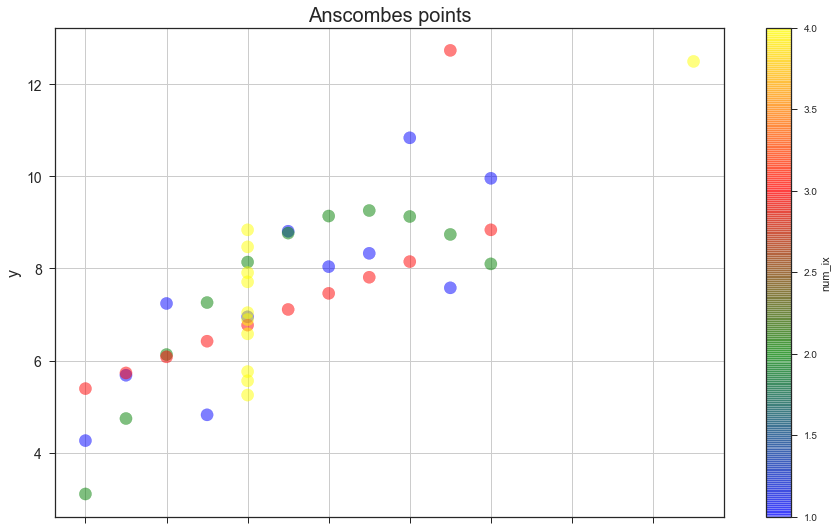

In [195]:

df.plot(kind='scatter',x='x',y='y',fontsize=14,s=150,c='num_ix',cmap=cmap,figsize=(15,9),alpha=0.5)
plt.title('Anscombes points',fontsize=20)
plt.xlabel('x',fontsize=16)
plt.grid()
_ = plt.ylabel('y',fontsize=16)

We can clearly see that our Anscombes dataset actually consists in four differens datasets all added up toghether in the same DataFrame, and each of the category labels are used to sepparate each different data set.

Print just first dataset

## Basic statistical parameters

Let's compare the basic statistical parameters of each dataset

In [7]:
df[df.dataset == 'I']

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [94]:
import numpy as np
df['new_index'] = df.groupby('dataset').transform(lambda x:np.arange(len(x)))['x'].values
idx = pd.IndexSlice
sep = df.pivot(columns='dataset',index='new_index')
sep.loc[:,idx[:,'I']]

,x,y
dataset,I,I
new_index,,
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26


In [8]:
groups = ['I', 'II', 'III', 'IV']
for group in groups:
    print(group)
    print(df[df.dataset == group].describe())
    print()

I
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

II
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

III
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

IV
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max  

Let's compare the correlation coefficient for each dataset

In [41]:
for g in groups:
    print(df[df.dataset == g]['x'].corr(df[df.dataset == g]['y']))

0.816420516345
0.816236506
0.81628673949
0.816521436889


## Plot

Plot datasets

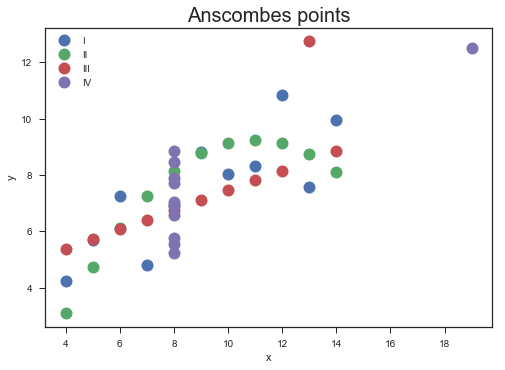

In [110]:
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
groups = df.groupby('dataset')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title('Anscombes points',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

plt.show()



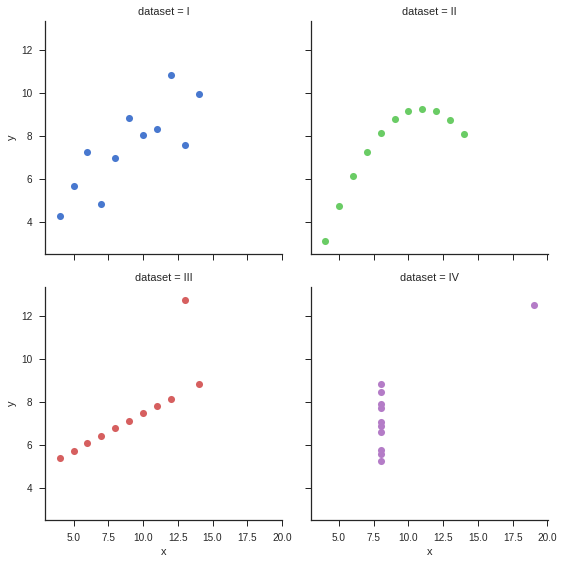

In [10]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1}, fit_reg=False)

In [ ]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
ax.legend()
plt.title('Anscombes points',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

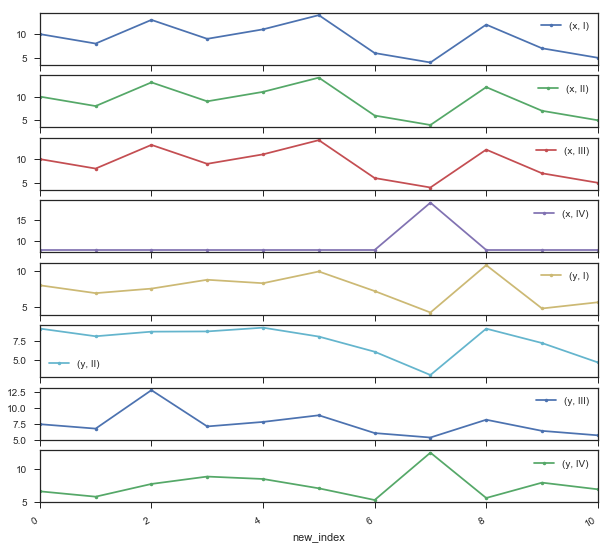

In [59]:
_=sep.plot(subplots=True,figsize=(10,10),marker='.')

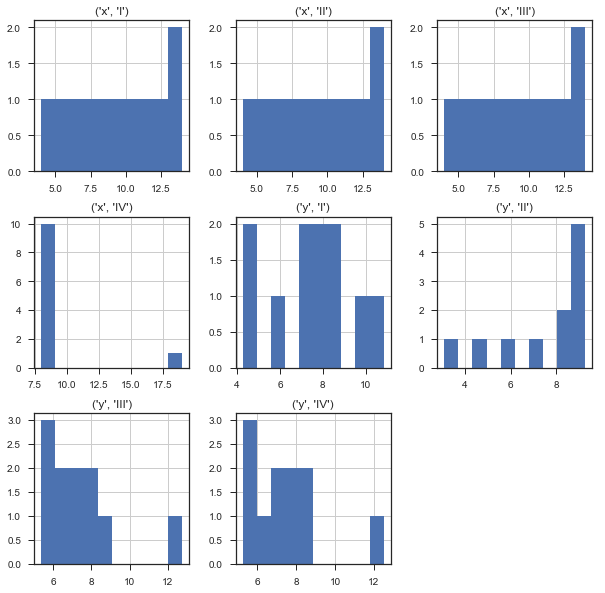

In [55]:
_ = sep.hist(figsize=(10,10))

In [49]:
g = sns.violinplot(x="x", y="y", data=sep,
               inner="quart")
sns.despine(left=True)


ValueError: cannot copy sequence with size 4 to array axis with dimension 11

In [25]:
sns.violinplot?

/home/kalidus/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


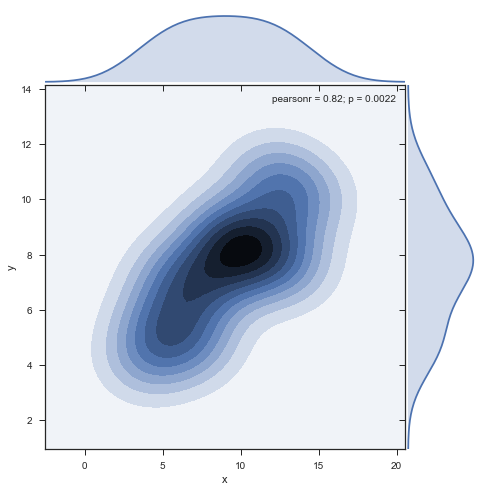

In [12]:
g = sns.jointplot(x="x", y="y",data=df[df['dataset']=='I'], kind="kde", size=7, space=0)

In [11]:
sns.jointplot?

## Linear regression

Show the results of a **linear regression** within each dataset

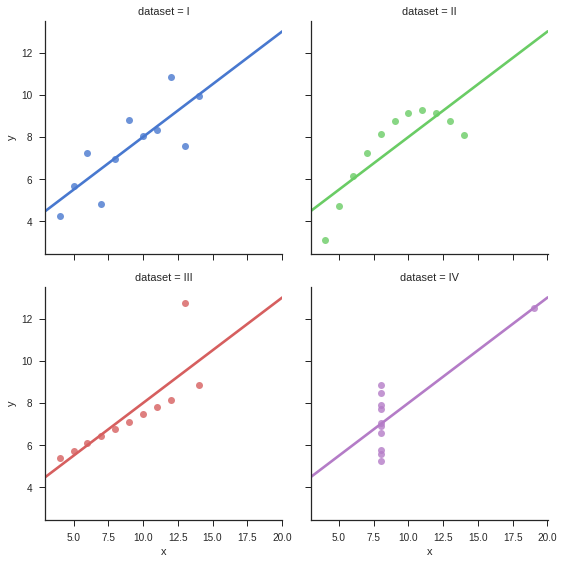

In [11]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4)

It's the same line for all datasets

Let's plot with its 95% confidence interval region.

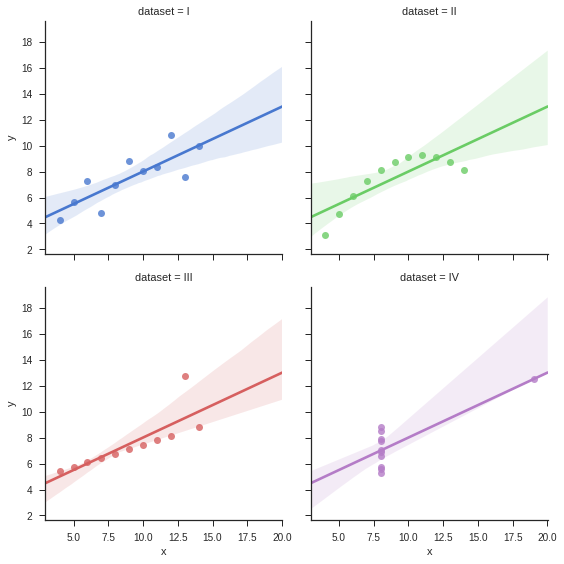

In [12]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=95, palette="muted", size=4)

# Key message

Visualize your data beforehand

## Nonlinear regression? outliers?

One can fit a polynomial regression model to explore simple kinds of **nonlinear** trends in the dataset

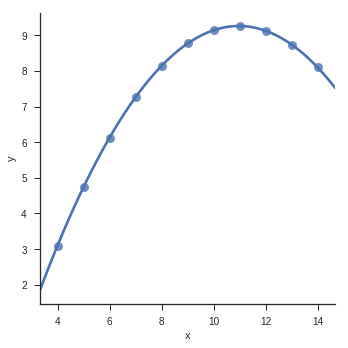

In [13]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'II'],
           order=2, ci=95, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

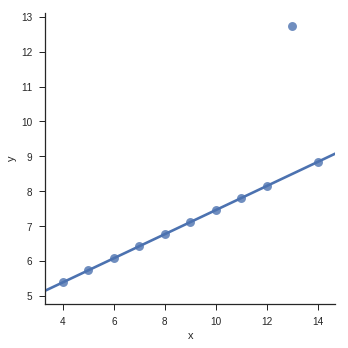

In [14]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'III'],
           robust=True, ci=None, scatter_kws={"s": 80});